In [13]:
# Impoting libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv(r"C:\Users\HP\Downloads\archive (7).zip")

In [19]:
# Displaying the first five rows of the DataFrame
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
data.shape

(1470, 35)

In [24]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
# Calculate attrition rate
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:")
print(attrition_rate)


Attrition Rate:
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [28]:
# Grouping by department and calculating attrition rate
department_attrition = data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
print("Attrition Rate by Department:")
print(department_attrition)

Attrition Rate by Department:
Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [32]:
# Grouping by age group and calculating attrition rate
age_groups = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70])
age_group_attrition = data.groupby(age_groups)['Attrition']
print("Attrition Rate by Age Group:")
print(age_group_attrition)

Attrition Rate by Age Group:


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


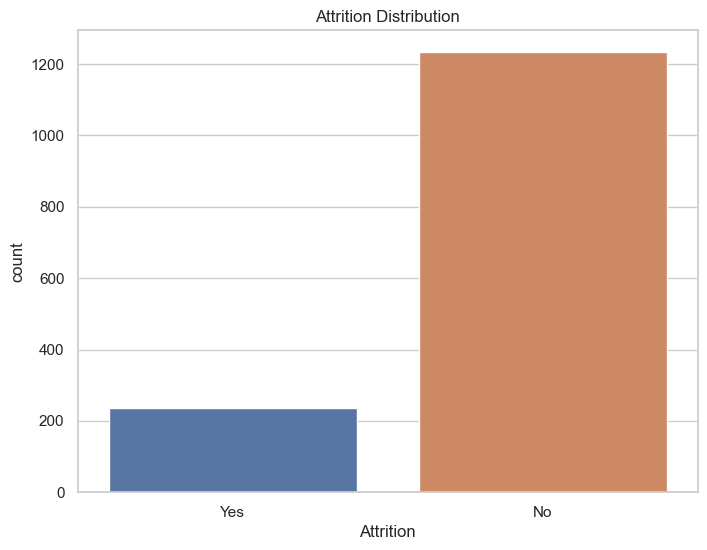

In [38]:
# Distribution of Attrition
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Attrition')
plt.title('Attrition Distribution')
plt.show()

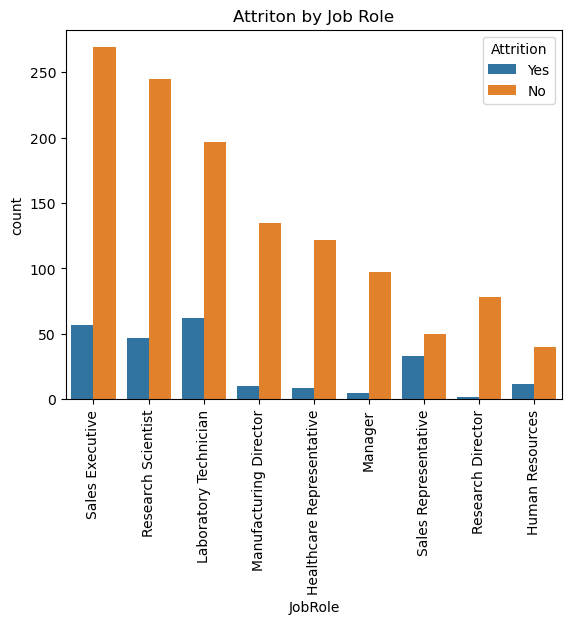

In [10]:
# Creating a count plot using Seaborn.
sns.countplot(x='JobRole',hue='Attrition', data=data)
plt.title("Attriton by Job Role")

# Rotating the x-axis labels by 90 degrees.
plt.xticks(rotation=90)
plt.show()

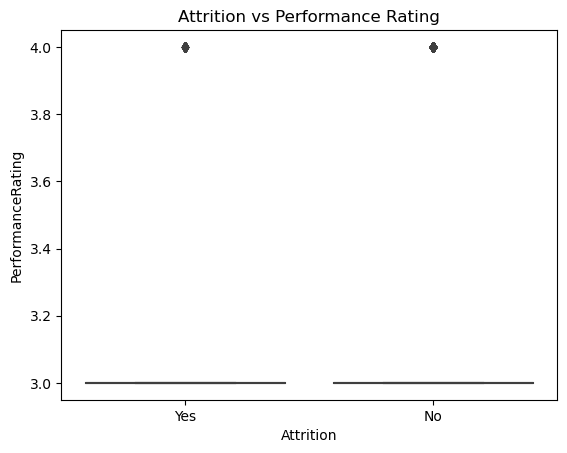

In [13]:
#Creating a box plot using Seaborn
sns.boxplot(x='Attrition',y='PerformanceRating',data=data)
plt.title('Attrition vs Performance Rating')
plt.show()

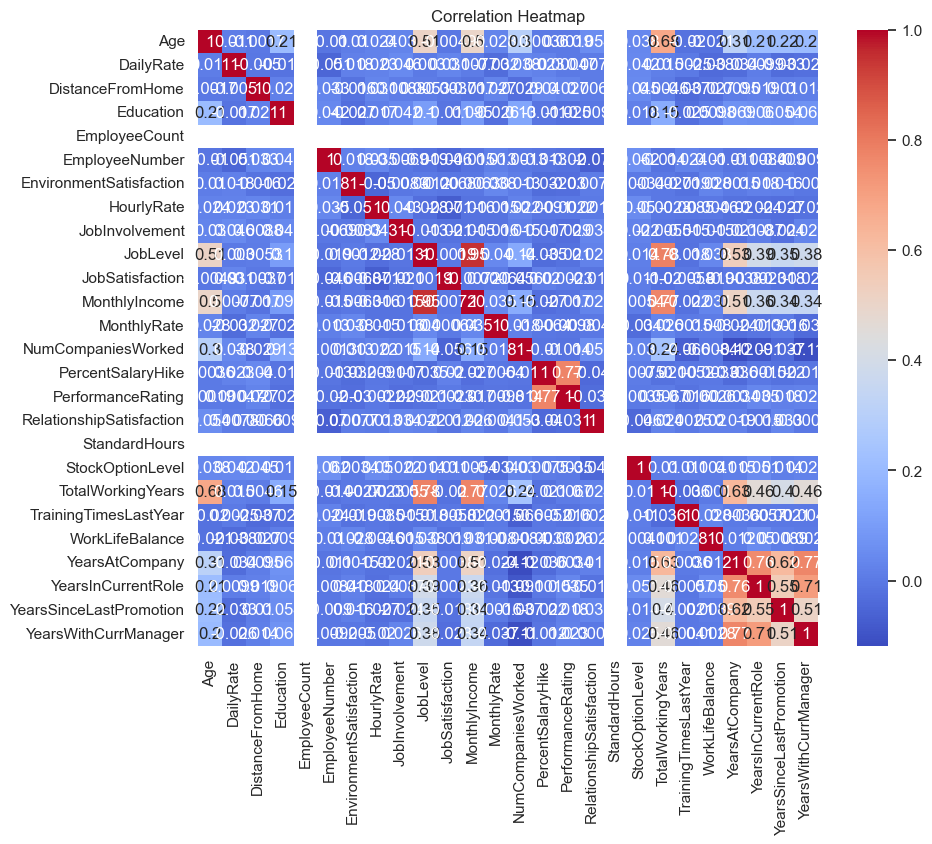

In [39]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

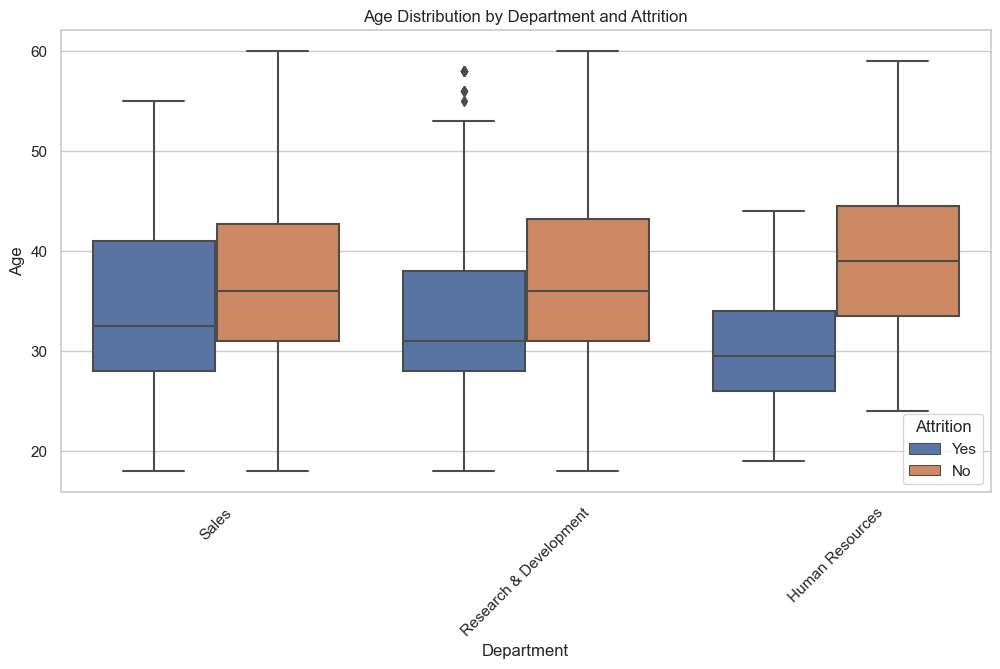

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Age', hue='Attrition', data=data)
plt.title('Age Distribution by Department and Attrition')
plt.xticks(rotation=45)
plt.show()

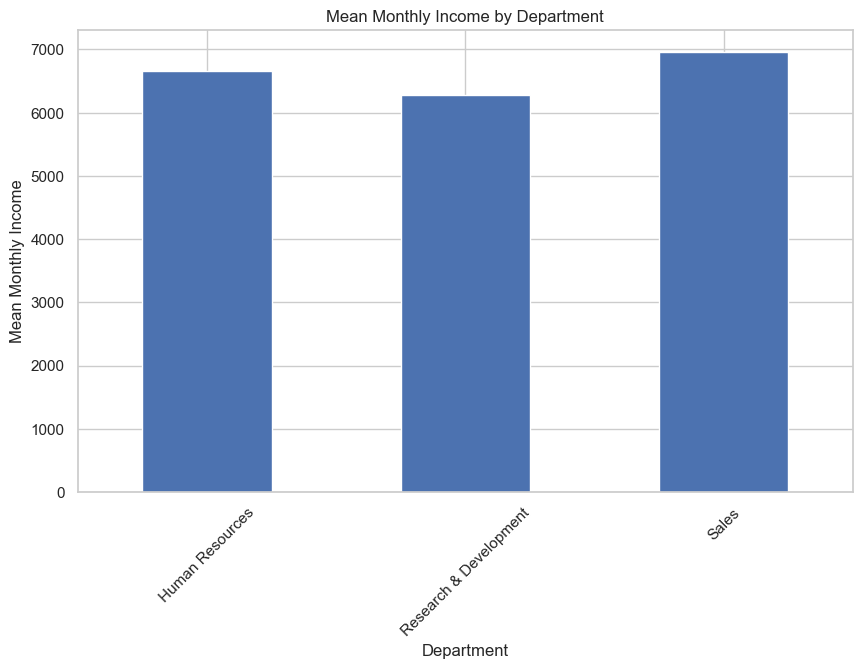

In [48]:
department_salary = data.groupby('Department')['MonthlyIncome'].mean()
department_salary.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Monthly Income by Department')
plt.ylabel('Mean Monthly Income')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Replace missing values in 'YearsSinceLastPromotion' with the mean value
mean_promotion = data['YearsSinceLastPromotion'].mean()
data['YearsSinceLastPromotion'].fillna(mean_promotion, inplace=True)

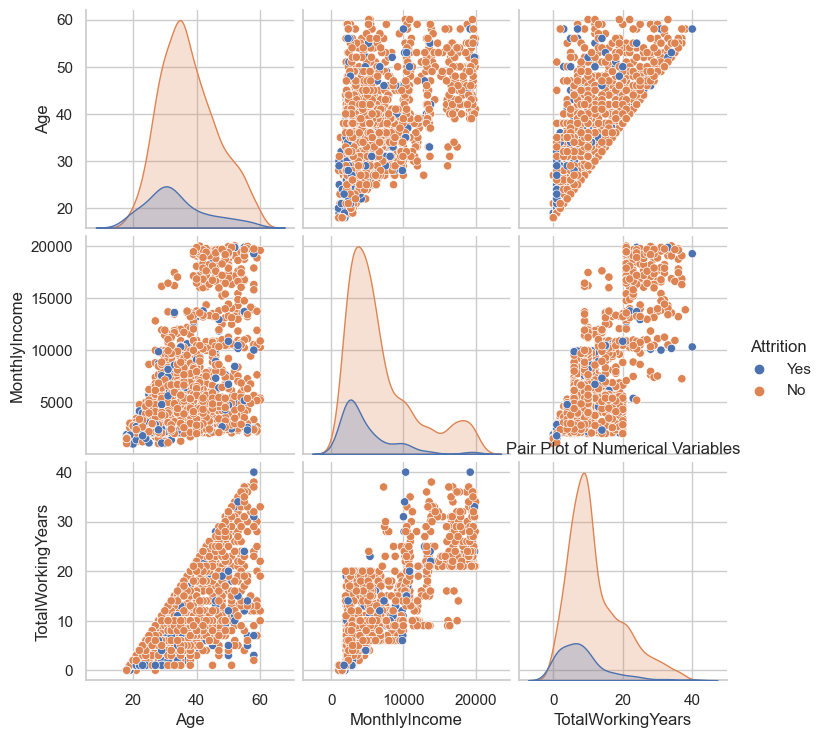

In [53]:
sns.pairplot(data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition']], hue='Attrition')
plt.title('Pair Plot of Numerical Variables')
plt.show()